In [13]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from IPython.display import display_markdown
import matplotlib.dates as mdates

In [14]:
dados = pd.read_csv('.\\..\\..\\Dataset\\testes\\casos_diarios_total.csv')

In [15]:
dados

,dt_notificacao,casos
0,2013-12-29,74
1,2013-12-30,181
2,2013-12-31,62
3,2014-01-01,63
4,2014-01-02,195
...,...,...
3901,2024-09-03,1055
3902,2024-09-04,1013
3903,2024-09-05,940
3904,2024-09-06,681


In [16]:
anos = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
dados_ano = {}

for ano in anos:

    dados_ano[ano] = pd.DataFrame(
                        dados \
                        .where(
                              (dados['dt_notificacao'] >= f'{ano}-01-01')
                            & (dados['dt_notificacao'] <= f'{ano}-12-01')
                        )
                    ) \
                    .dropna(subset=["dt_notificacao"])

#data['Time'] = np.arange(len(data.index))

In [17]:
anos.append('TOTAL')

dados_ano['TOTAL'] = dados

### 2014

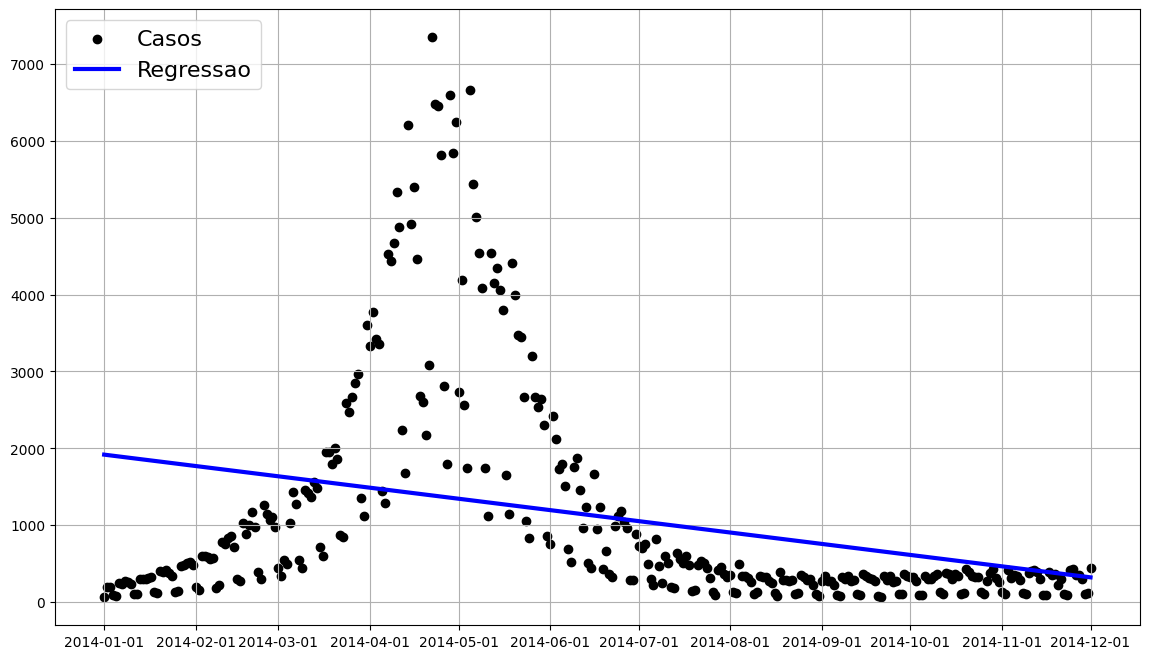

### 2015

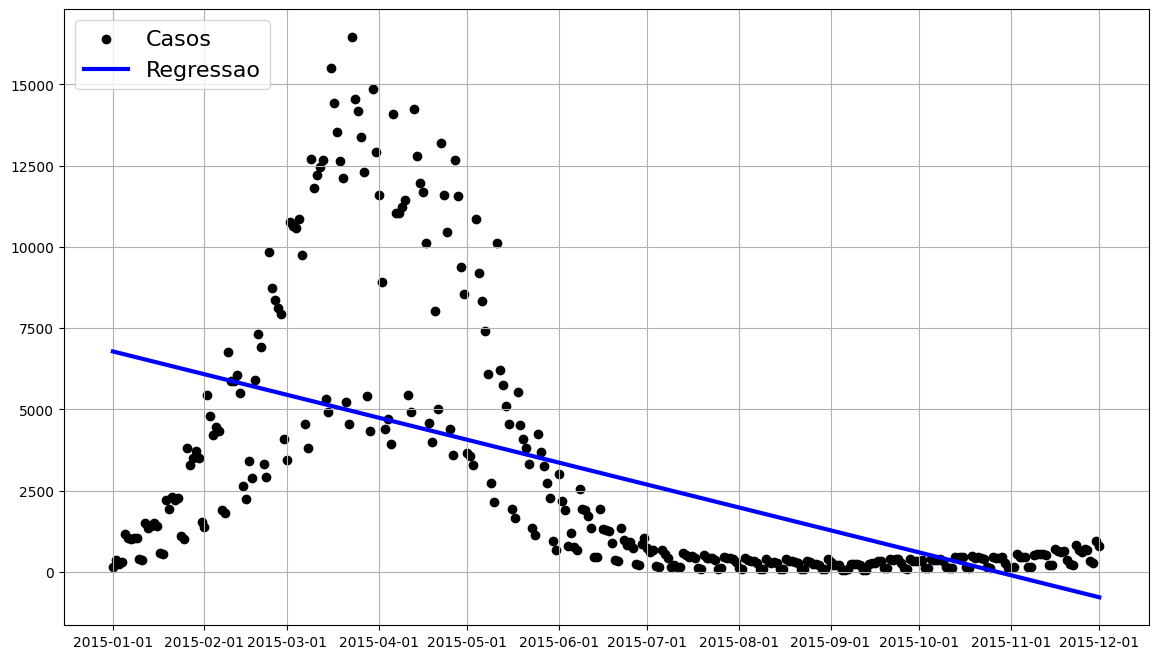

### 2016

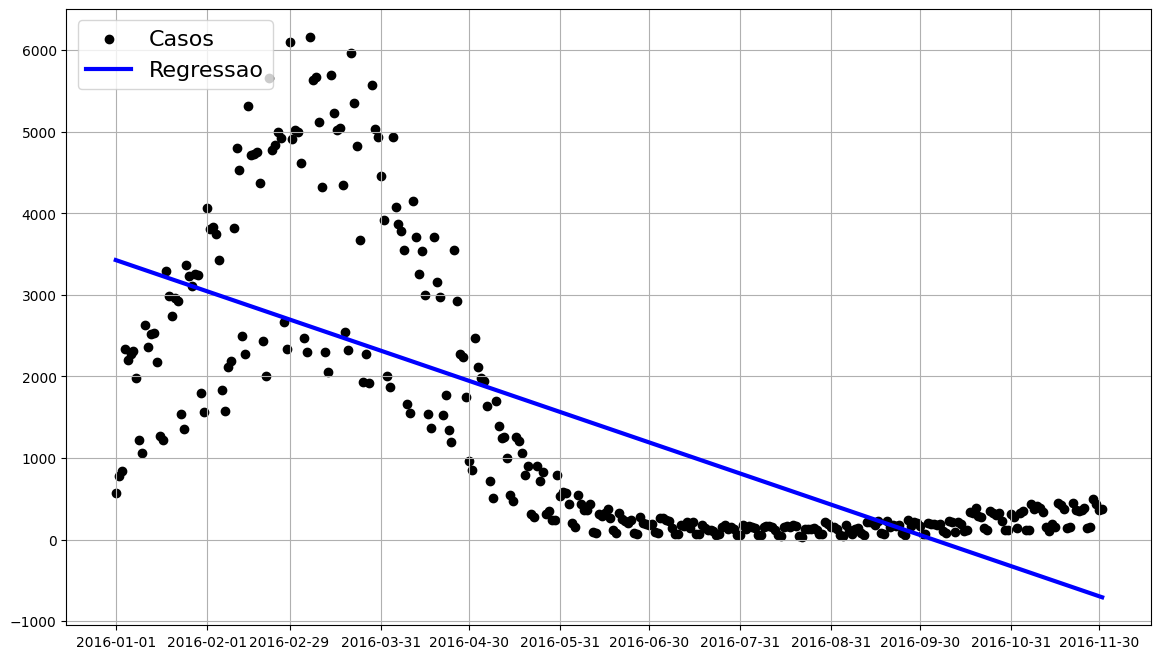

### 2017

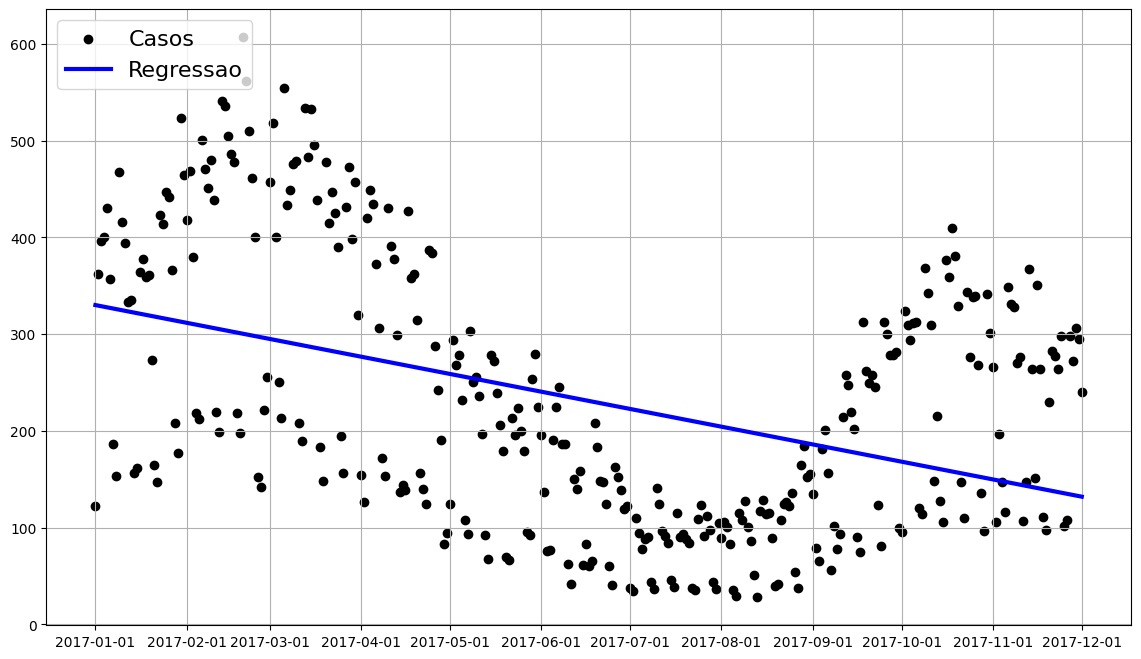

### 2018

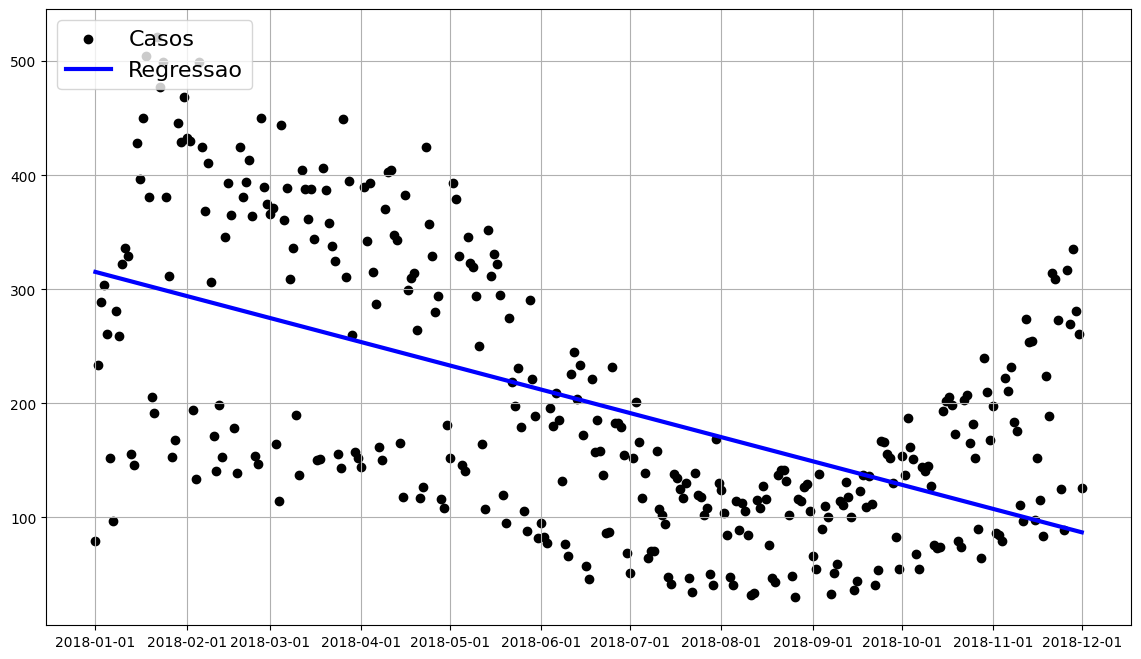

### 2019

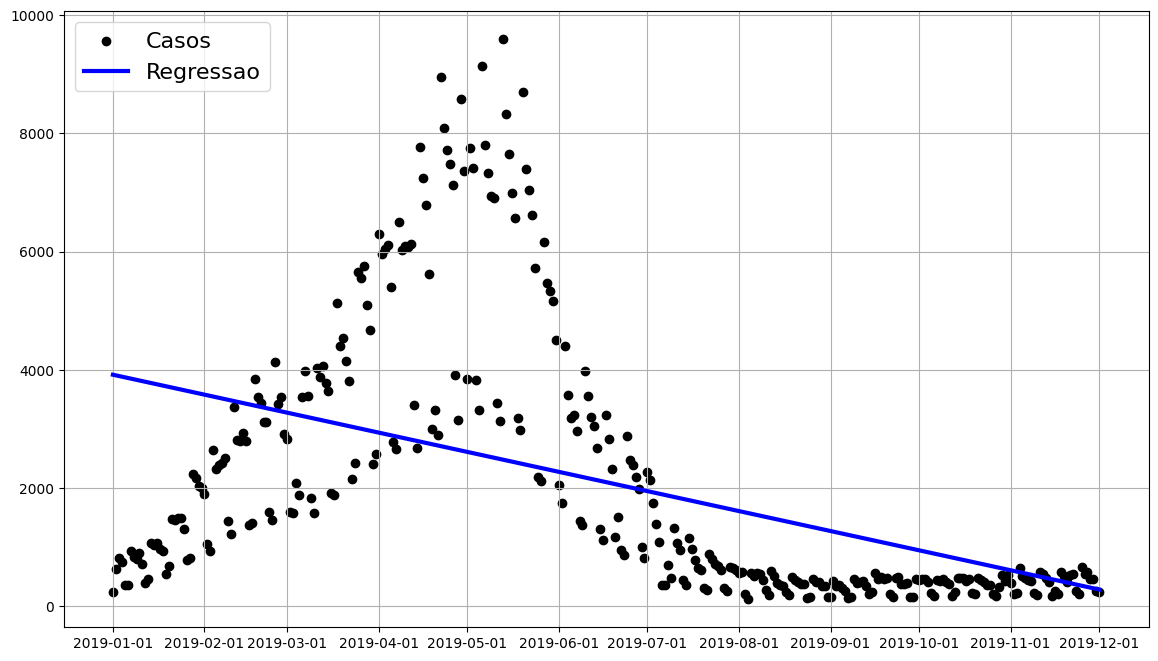

### 2020

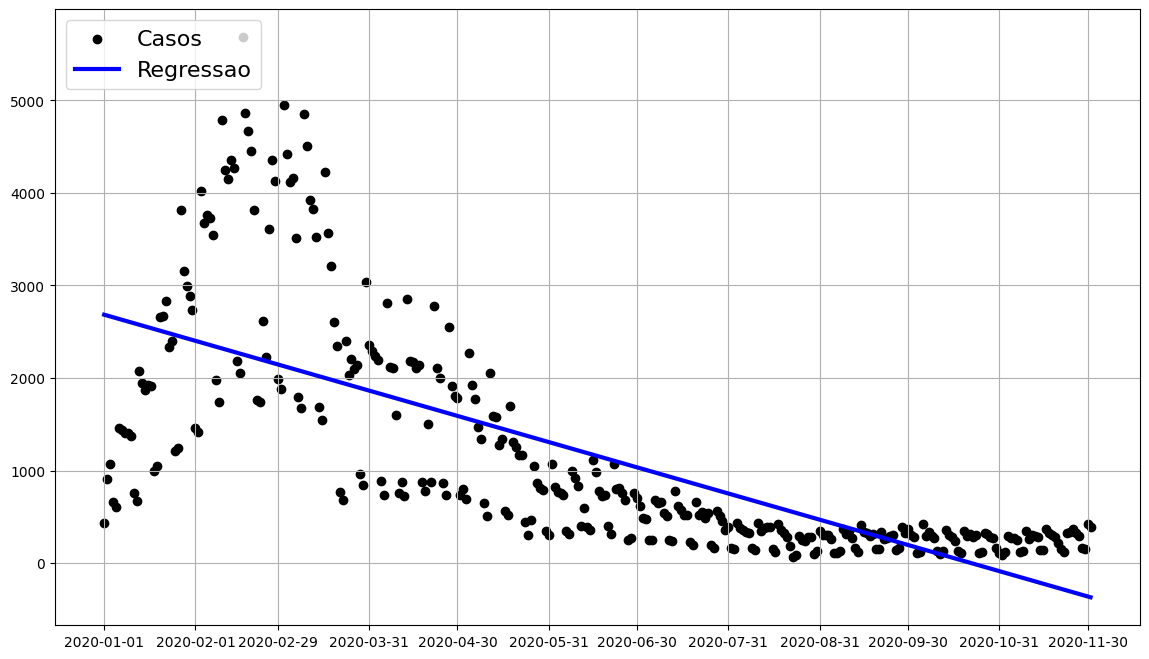

### 2021

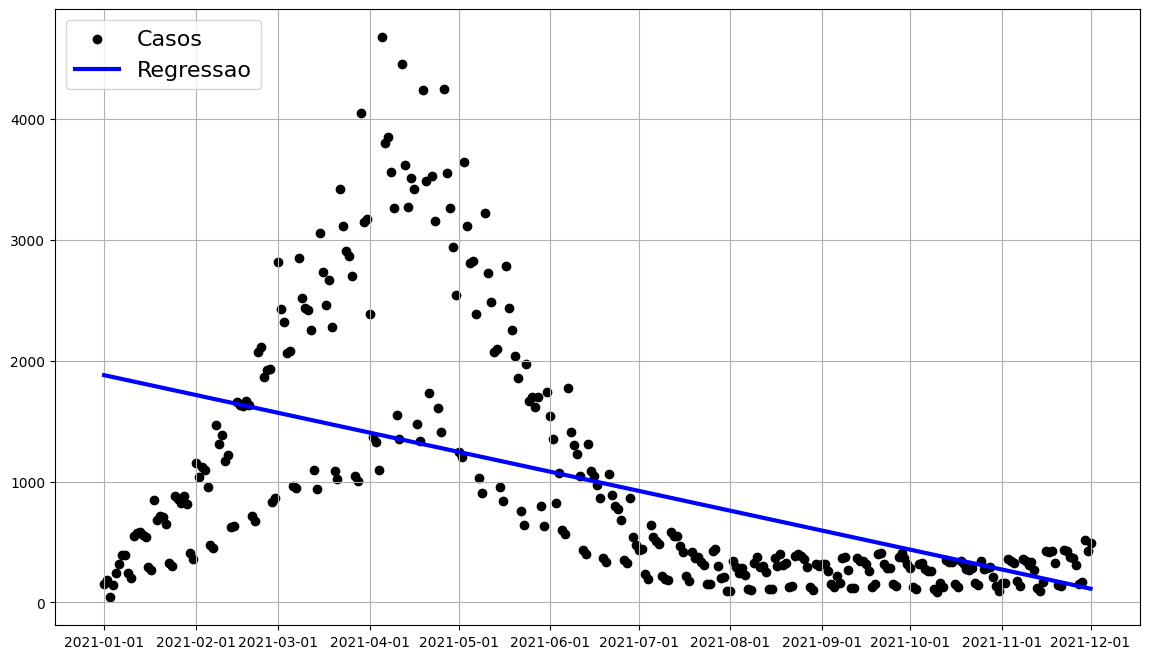

### 2022

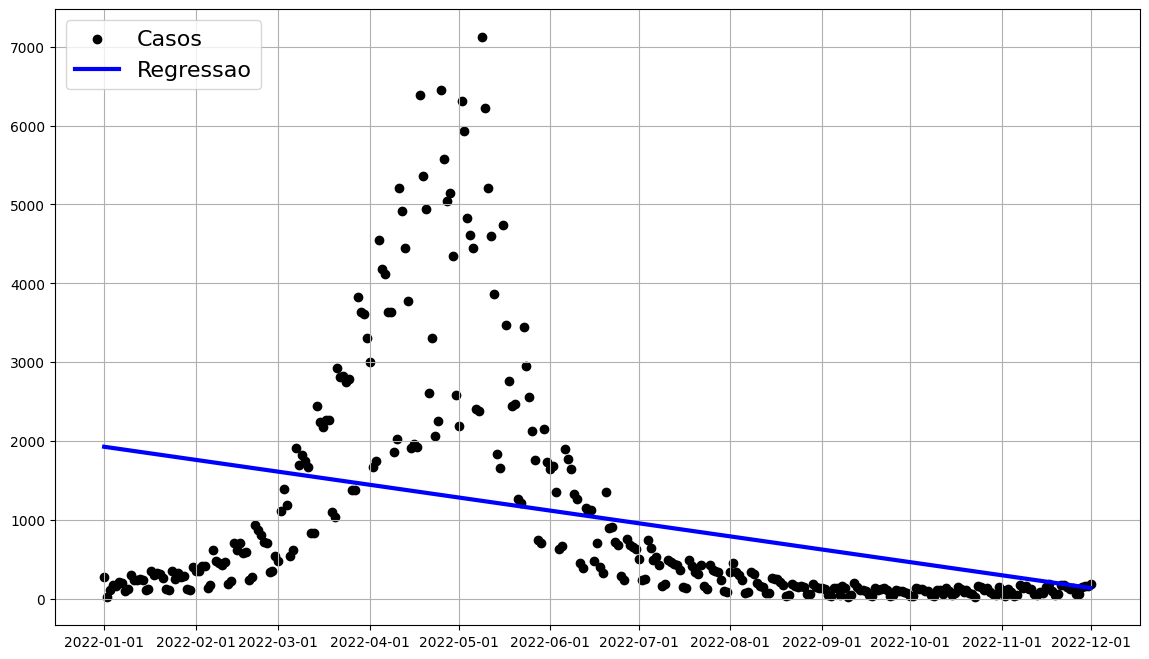

### 2023

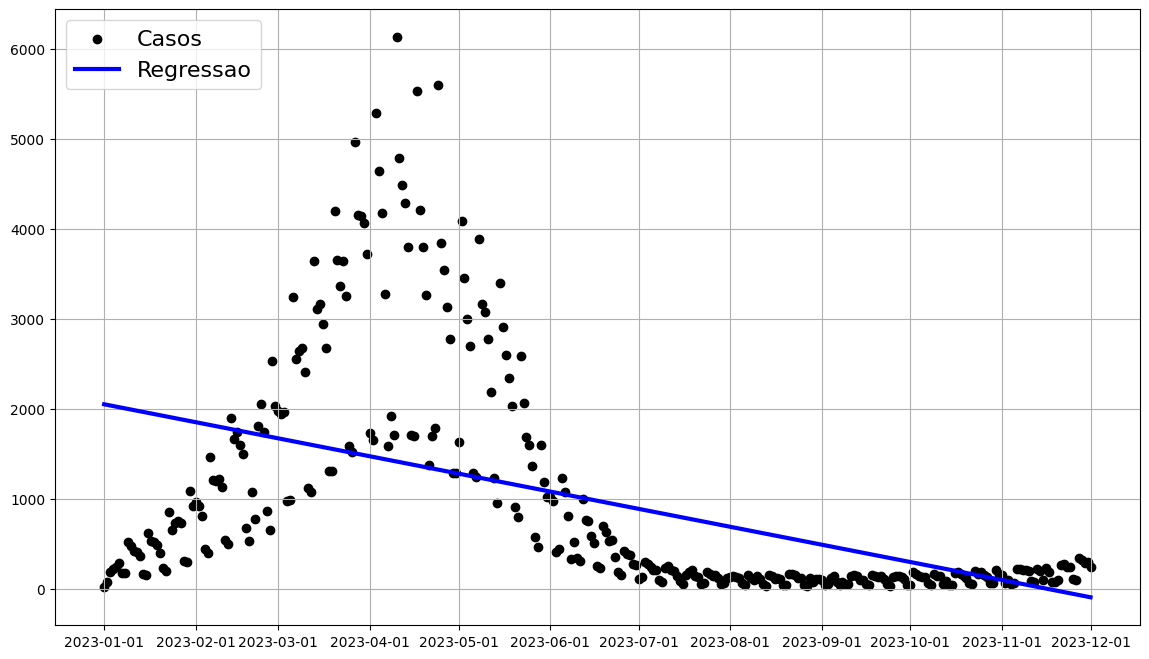

### 2024

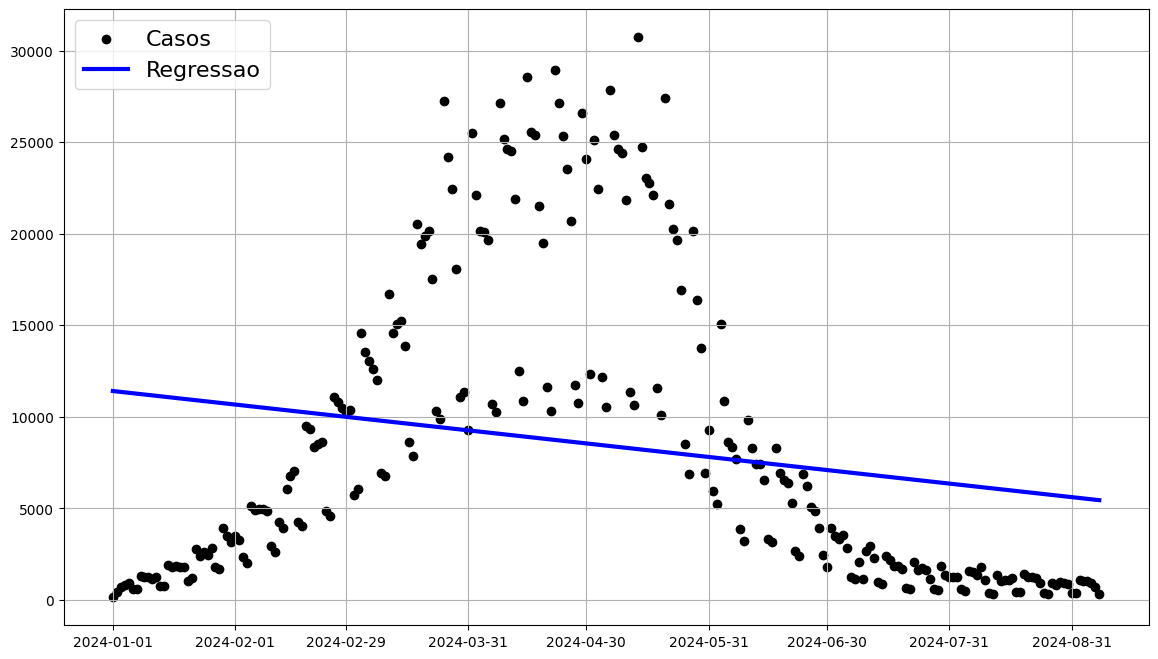

### TOTAL

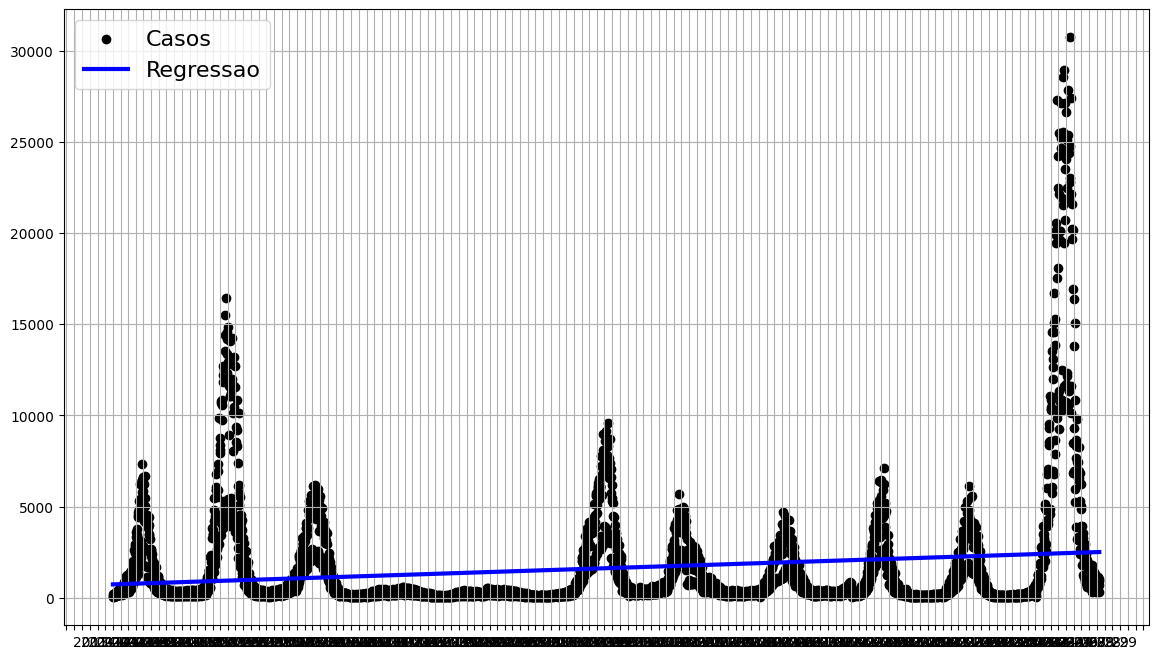

In [18]:
for ano in anos:

    data = dados_ano[ano]

    data['Time'] = np.arange(len(data.index))

    x = data.loc[:, ['Time']]
    y = data.loc[:, 'casos'] 

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    plt.figure(figsize=(14, 8), dpi=100)

    plt.scatter(data['dt_notificacao'], y, color='black')
    plt.plot(data['dt_notificacao'], regr.predict(x), color='blue', linewidth=3)

    plt.gca().xaxis.set_major_locator(mdates.DayLocator(bymonthday=1))

    plt.grid(True)

    plt.legend(['Casos', 'Regressao'], loc=2, prop={'size': 16})

    display_markdown(f'### {ano}', raw=True)
    plt.show()